In [35]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv', header = None)
df

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.columns = ["Pregnancies","Glucose","BP","SkinThickness","Insulin","BMI","DiabetesPredigree","Age","Outcome"]
df

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DiabetesPredigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<h3> Tuning Batch Size and Number of Epochs </h3> 

Number of epochs is the number of times that the entire training dataset is shown to the network during training. 

In [4]:
from sklearn.model_selection import GridSearchCV

In [5]:
def create_model():
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape = (8,)))
    model.add(keras.layers.Dense(12, activation = 'relu'))
    model.add(keras.layers.Dense(1,activation='sigmoid'))
    optim = keras.optimizers.Adam()
    model.compile(loss = "binary_crossentropy",optimizer = optim, metrics = ['accuracy'])
    return model

In [6]:
#fixing random seed
seed = 7
np.random.seed(seed)

In [8]:
df_1 = df.copy()

In [9]:
X_1 = df.iloc[:,0:8]
y_1 = df.iloc[:,8]

In [12]:
model_1 = keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, verbose = 0)

In [13]:
batch_size = [10,20,40,60,80,100]
epochs = [10,50,100]
param_grid = dict(batch_size = batch_size, epochs = epochs)

In [23]:
grid = GridSearchCV(estimator = model_1, param_grid = param_grid, n_jobs = -1, cv = 3, return_train_score= True)
grid

GridSearchCV(cv=3,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000001B183151B80>,
             n_jobs=-1,
             param_grid={'batch_size': [10, 20, 40, 60, 80, 100],
                         'epochs': [10, 50, 100]},
             return_train_score=True)

In [24]:
grid_result = grid.fit(X_1,y_1)

In [39]:
grid_result.best_params_

{'batch_size': 40, 'epochs': 100}

In [25]:
grid_result.cv_results_

{'mean_fit_time': array([ 4.1145738 ,  7.42240167, 10.91776188,  2.87963867,  5.0262351 ,
         6.83406742,  2.63229609,  3.57843471,  4.9487733 ,  2.68549164,
         3.13129775,  3.82311241,  2.42052619,  2.83709049,  3.22538177,
         2.14692911,  2.1286428 ,  2.70842632]),
 'std_fit_time': array([0.17477021, 0.23725445, 0.57333579, 0.08044045, 0.1754351 ,
        0.10034101, 0.18336416, 0.21499963, 0.3782188 , 0.15860726,
        0.06089713, 0.28687774, 0.23372938, 0.3865662 , 0.2163144 ,
        0.07247621, 0.09155564, 0.02363394]),
 'mean_score_time': array([1.59507108, 1.13430142, 1.42286301, 0.77459518, 0.85471567,
        0.96475776, 0.73702995, 0.83443721, 0.80518508, 0.73204271,
        0.625995  , 0.66256531, 0.77625855, 0.67086585, 0.60338958,
        0.59042223, 0.55485034, 0.28557102]),
 'std_score_time': array([0.05834919, 0.04702149, 0.54050061, 0.04066945, 0.03638263,
        0.07048392, 0.01840921, 0.03030956, 0.11047962, 0.10600908,
        0.1506254 , 0.0766

In [26]:
#plotting effect of epoch and batch on test_score
parameters_used = grid_result.cv_results_["params"]
parameter_labels = ["batch_size : {} , epochs : {}".format(i["batch_size"],i["epochs"]) for i in parameters_used]
test_means = grid_result.cv_results_["mean_test_score"]
train_means = grid_result.cv_results_["mean_train_score"]

<ipython-input-38-5332734edcce>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_epoch_batch_train.set_xticklabels(parameter_labels, rotation = 45)


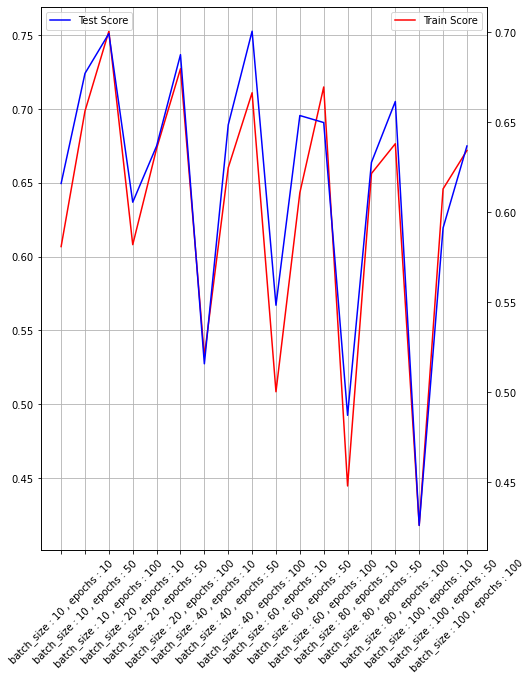

In [38]:
fig,ax_epoch_batch_train = plt.subplots(1,1,figsize = (8,10))
ax_epoch_batch_test = ax_epoch_batch_train.twinx()
sns.lineplot(x = parameter_labels, y = train_means, ax = ax_epoch_batch_train, label = "Train Score", color = 'r')
sns.lineplot(x = parameter_labels, y = test_means, ax = ax_epoch_batch_test, label = "Test Score", color = 'b')
ax_epoch_batch_train.set_xticklabels(parameter_labels, rotation = 45)
ax_epoch_batch_train.legend(loc  ="upper right")
ax_epoch_batch_test.legend(loc  ="upper left")
ax_epoch_batch_train.grid()